## Chapter 08 딥러닝을 시작합니다 ▶️패션 럭키백을 판매합니다!
#### 08-2 합성곱 신경망을 사용한 이미지 분류 ▶️케라스 API로  합성곱 신경망 모델 만들기 

In [1]:
## dataset 준비 
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## train, validation set을 구분 
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

## 합성곱은 3차원 입력값을 기대함(가로x세로x깊이(컬러)), 따라서 reshape를 사용하여 전체 배열 차원을 유지하면서 마지막에 차원(채널)을 추가함 
## 흑백 이미지이므로 채널값은 1임 
train_scaled = train_input.reshape(-1,28,28,1) / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(48000, 28, 28, 1) (12000, 28, 28, 1) (48000,) (12000,)


----
#### 1. CNN 구성 
- 1) Sequential 객체를 만들고, Conv2D 레이어 & MaxPooling2D 레이어 추가 (filters = 32)
- 2) 두번째 Conv2D 레이어 & MaxPooling2D 레이어 추가 (filters = 64) 
- 3) 3차원 데이터를 출력을 위해 1차원으로 변경하고, Dropout()적용하여 최종 출력 

In [2]:
model = keras.Sequential()

## layer 1 
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
## layer 2 
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
## layer 3~6
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
## keras.utils.plot_model()을 이용하여 신경망을 그림으로 출력 (참고: graphviz 사용을 위한 파일 다운로드 및 윈도우 환경설정 필요)
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz

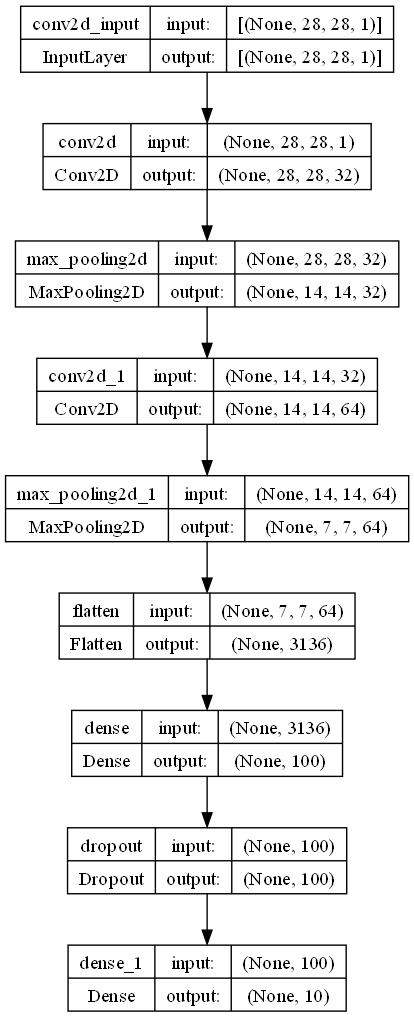

In [4]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn_architecture.png', dpi = 100)

---- 
#### 2. Model Compile & fitting & evaluation 
- optimizer = 'Adam', ModelCheckpoint와 EarlyStopping 사용 

In [5]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
chekpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, 
                   validation_data = (val_scaled, val_target),
                   callbacks = [chekpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5169 - accuracy: 0.8156 - val_loss: 0.3345 - val_accuracy: 0.8755
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3429 - accuracy: 0.8768 - val_loss: 0.2842 - val_accuracy: 0.8951
Epoch 3/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2898 - accuracy: 0.8942 - val_loss: 0.2536 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2591 - accuracy: 0.9055 - val_loss: 0.2426 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2346 - accuracy: 0.9139 - val_loss: 0.2353 - val_accuracy: 0.9136
Epoch 6/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2166 - accuracy: 0.9203 - val_loss: 0.2426 - val_accuracy: 0.9134
Epoch 7/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.1988 - accuracy: 0.9279 - val_loss: 0.2279 -

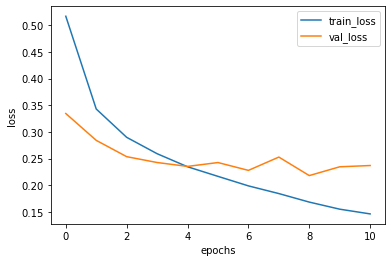

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

- 11번째 반복에서 훈련이 중단되었다. (최소 loss는 epochs = 10) 
- 차트상으로 보면 epochs = 4 또는 10를 best model로 선택할 수 있을 듯 하다. 

In [14]:
print('best epochs =', early_stopping_cb.stopped_epoch)

best epochs = 10


In [7]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2181 - accuracy: 0.9228


[0.21810033917427063, 0.9228333234786987]

In [8]:
## test set에 대한 검증 : 2차원 이미지인 test_input을 1차원으로 변경하고 0~1사이 값으로 표준화한다. 
test_scaled = test_input.reshape(-1, 28,28, 1) / 255
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9193


[0.2417750507593155, 0.9193000197410583]

----
#### 참고. 훈련된 모델을 사용하여 특정값의 상품종류를 예측하기 
- label info. = {0:'티셔츠', 1:'바지', 2:'스웨터', 3:'드레스', 4:'코트', 
                 5:'샌달, 6:'셔츠', 7:'스니커즈', 8:'가방', 9:'앵클부츠'}  

In [9]:
## 케라스의 fit(), evaluate(), predict()는 변수로 배치차원을 필요로 함
## 따라서 val_scaled[0]이 아닌, val_scaled[0:1]로 해줘야 함 
import numpy as np
np.round(model.predict(val_scaled[0:1]), 2)

1/1 [==============================] - 0s 66ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

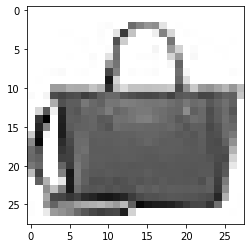

In [10]:
## 가장 큰 값이 8:'가방'으로 예측됨. 이미지 출력하여 확인 
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

In [11]:
np.round(model.predict(test_scaled[0:1]), 2)

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

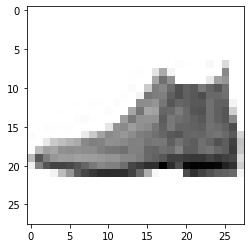

In [12]:
plt.imshow(test_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

1/1 [==============================] - 0s 14ms/step
[[0.   0.   0.01 0.   0.99 0.   0.   0.   0.   0.  ]]


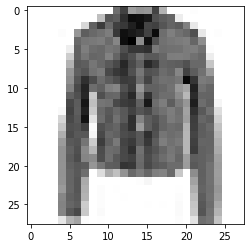

In [13]:
print(np.round(model.predict(test_scaled[10:11]), 2))
plt.imshow(test_scaled[10].reshape(28,28), cmap = 'gray_r')
plt.show()